In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.set_cmap('YlGnBu')
sns.set_palette('YlGnBu')

from sklearn.metrics import pairwise_distances, pairwise_kernels

import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

In [4]:
df_raw = pd.read_excel("DIs(改).xlsx")
df_raw.head()

,Unnamed: 0,ID,DOI,Reference,location,location comment,craton,GPS Location,sample,mineral（Diamond/Inclusion/Sulfide）,Si(wt.%),Ti(wt.%),Al(wt.%),Cr(wt.%),V(wt.%),Mn(wt.%),Mg(wt.%),Ca(wt.%),Sr(wt.%),Ba(wt.%),Na(wt.%),P(wt.%),K(wt.%),Cl(wt.%),Fe(wt.%),Co(wt.%),Ni(wt.%),Cu(wt.%),S(wt.%),Zn(wt.%),Pb(wt.%),O(wt.%),Total,δ 34S(‰),(Ni+Co)/Fe,Cu/metals,Re,Os,187Re/188Os,Method（主量）,Comment（Inclusion/Sulfide）,Cr,V,Co,Ni,Cu,Zn,Ga,As,Se,Mo,Ag,Cd,In,Sn,Sb,Te,Wl,Hg,Tl,Bi,Ru,Pd,Re.1,Os.1,Ir,Pt,Au,Rb,Sr,Y,Zr,Nb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Dy,Ho,Er,Yb,Lu,Hf,Ta,W,Pb,Th,U,Ti,Tb,Tm,Sc,Fe,Fe2+,Fe3+,Li,B,Na,Al,K,Ca,Mn,Ge,Be,Mg,Si,S,Cl,F,P,Diamond_Method,Inclusion_Method
0,0,760.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-65,Cpx,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,761.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-65,Cpx,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,762.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-65,Cpx,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,763.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-65,Cpx,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,764.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-73,Cpx,26.086853,0.359640,6.82926,0.041052,0.0,0.038720,4.554,8.00016,0.0,0.0,4.903959,0.0,0.165958,NaN,3.756677,0.0,0.0,NaN,0.0,0.0,NaN,45.202917,99.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df_raw.copy()
df.shape

(3309, 117)

In [6]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
# df.drop(['Unnamed: 0', 'ID', 'DOI', 'Reference', 'location', 'location comment', 'location',  'GPS Location',
#          'Diamond_Method', 'Inclusion_Method', 'sample', 'mineral（Diamond/Inclusion/Sulfide）', 
#         'Method（主量）', 'Comment（Inclusion/Sulfide）'], 
#         axis = 1, inplace=True)
df.shape

(3309, 102)

In [9]:
mineral = df['mineral（Diamond/Inclusion/Sulfide）']

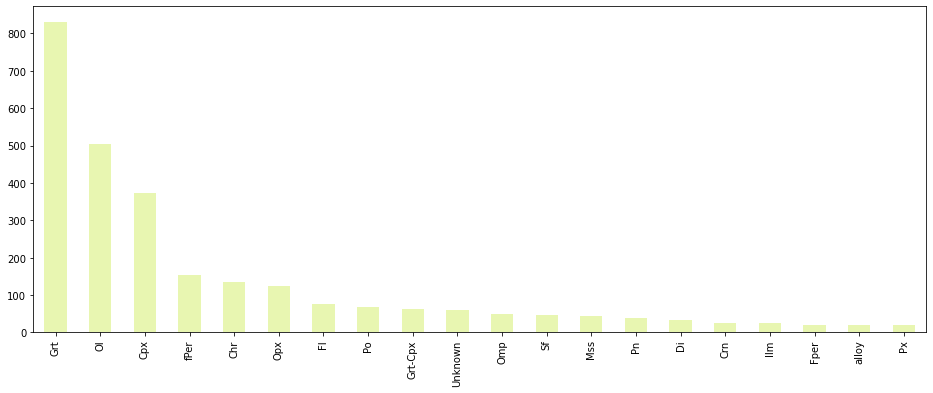

In [38]:
plt.figure(figsize=(16, 6))
mineral.value_counts().iloc[:20,].plot(kind = 'bar')
plt.show()

In [25]:
mineral.value_counts().iloc[:6,].index

Index(['Grt', 'Ol', 'Cpx', 'fPer', 'Chr', 'Opx'], dtype='object')

In [30]:
df2 = df[df['craton'].isin(['Kaapvaal', 'Siberia', 'Slave'])]
df2.shape

(1599, 102)

In [31]:
df3 = df2[df2['mineral（Diamond/Inclusion/Sulfide）'].isin(['Grt', 'Ol', 'Cpx', 'fPer', 'Chr', 'Opx'])]
df3.shape

(981, 102)

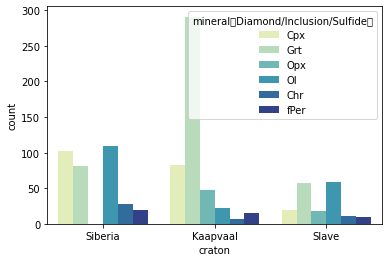

In [39]:
sns.countplot(data = df3, hue = 'mineral（Diamond/Inclusion/Sulfide）', x='craton')

In [68]:
df4 = df2.groupby(['craton', 'mineral（Diamond/Inclusion/Sulfide）']).size().unstack(fill_value=0)
df4

mineral（Diamond/Inclusion/Sulfide）,Ab,CaCO3,CaPrv,CaSiO3,Cb,Ccp,Chr,Cpx,Cpx-Opx,Cpx-Opx-SiO2,Cr-Di,Cr-Prp,Cr-Spl,Cu-Niphase,Cu-phase,Di,E-Grt,FI,Ferro-Periclase,Fl,Fo,Fo-Sf,Fper,Grp,Grp-Cb,Grp-Fe,Grt,Grt-Cpx,HDF,Hz,Hz-Pn,Ilm,K-Fsp,Mag,Magnsio-Wstite,Maj,Mellilite,MgCO3,MgPrv,MgSiO4,Mss,Ni-Peotlandite,Ni-phase,OL,Ol,Ol-Chr,Ol-Sf,Omp,Opx,Pcntlandite,Pentland,Pgt/Aug,Phg,Phl,Pl,Pn,Pn-Hz,Po,Po-Pn,Po-Pn-Ccp,PoPn,Px,Py,Rt,Ru,Sf,SiO2,Sl,Spl,Srp,Ttm,Ttn,Unknown,Unknown(black),fPer,ilm,py,silicate inclusion
craton,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kaapvaal,0,1,0,0,1,18,7,83,3,2,0,0,0,0,0,1,0,0,4,31,0,0,0,0,0,0,291,60,0,1,1,0,0,3,1,0,0,1,0,0,38,0,0,1,22,0,0,0,47,0,0,2,4,2,1,30,1,50,4,1,5,0,1,0,0,2,3,3,0,0,0,1,1,0,15,0,1,0
Siberia,2,0,0,0,2,0,28,103,0,0,0,0,13,1,13,0,0,0,0,0,3,1,0,1,2,1,81,0,10,0,0,9,1,0,0,4,0,0,0,0,0,1,10,0,110,1,3,14,0,4,1,0,0,5,0,8,0,18,0,0,0,19,0,5,1,0,0,0,5,2,0,0,44,2,20,1,0,6
Slave,0,0,2,1,0,0,11,19,0,0,1,4,0,0,0,9,11,7,0,14,9,0,5,0,0,0,58,0,0,0,0,0,0,0,0,3,1,0,3,1,6,0,0,0,59,0,0,13,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,19,1,0,1,0,1,0,0,0,9,0,0,0


In [76]:
df5 = df4.apply(lambda x: x/x.sum(), axis = 1)
df5

mineral（Diamond/Inclusion/Sulfide）,Ab,CaCO3,CaPrv,CaSiO3,Cb,Ccp,Chr,Cpx,Cpx-Opx,Cpx-Opx-SiO2,Cr-Di,Cr-Prp,Cr-Spl,Cu-Niphase,Cu-phase,Di,E-Grt,FI,Ferro-Periclase,Fl,Fo,Fo-Sf,Fper,Grp,Grp-Cb,Grp-Fe,Grt,Grt-Cpx,HDF,Hz,Hz-Pn,Ilm,K-Fsp,Mag,Magnsio-Wstite,Maj,Mellilite,MgCO3,MgPrv,MgSiO4,Mss,Ni-Peotlandite,Ni-phase,OL,Ol,Ol-Chr,Ol-Sf,Omp,Opx,Pcntlandite,Pentland,Pgt/Aug,Phg,Phl,Pl,Pn,Pn-Hz,Po,Po-Pn,Po-Pn-Ccp,PoPn,Px,Py,Rt,Ru,Sf,SiO2,Sl,Spl,Srp,Ttm,Ttn,Unknown,Unknown(black),fPer,ilm,py,silicate inclusion
craton,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kaapvaal,0.000000,0.001344,0.000000,0.000000,0.001344,0.024194,0.009409,0.111559,0.004032,0.002688,0.000000,0.000000,0.000000,0.000000,0.000000,0.001344,0.000000,0.00000,0.005376,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.391129,0.080645,0.000000,0.001344,0.001344,0.000000,0.000000,0.004032,0.001344,0.000000,0.000000,0.001344,0.000000,0.000000,0.051075,0.000000,0.000000,0.001344,0.029570,0.000000,0.000000,0.000000,0.063172,0.000000,0.000000,0.002688,0.005376,0.002688,0.001344,0.040323,0.001344,0.067204,0.005376,0.001344,0.00672,0.000000,0.001344,0.000000,0.000000,0.002688,0.004032,0.004032,0.000000,0.000000,0.000000,0.001344,0.001344,0.000000,0.020161,0.000000,0.001344,0.000000
Siberia,0.003604,0.000000,0.000000,0.000000,0.003604,0.000000,0.050450,0.185586,0.000000,0.000000,0.000000,0.000000,0.023423,0.001802,0.023423,0.000000,0.000000,0.00000,0.000000,0.000000,0.005405,0.001802,0.000000,0.001802,0.003604,0.001802,0.145946,0.000000,0.018018,0.000000,0.000000,0.016216,0.001802,0.000000,0.000000,0.007207,0.000000,0.000000,0.000000,0.000000,0.000000,0.001802,0.018018,0.000000,0.198198,0.001802,0.005405,0.025225,0.000000,0.007207,0.001802,0.000000,0.000000,0.009009,0.000000,0.014414,0.000000,0.032432,0.000000,0.000000,0.00000,0.034234,0.000000,0.009009,0.001802,0.000000,0.000000,0.000000,0.009009,0.003604,0.000000,0.000000,0.079279,0.003604,0.036036,0.001802,0.000000,0.010811
Slave,0.000000,0.000000,0.006969,0.003484,0.000000,0.000000,0.038328,0.066202,0.000000,0.000000,0.003484,0.013937,0.000000,0.000000,0.000000,0.031359,0.038328,0.02439,0.000000,0.048780,0.031359,0.000000,0.017422,0.000000,0.000000,0.000000,0.202091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010453,0.003484,0.000000,0.010453,0.003484,0.020906,0.000000,0.000000,0.000000,0.205575,0.000000,0.000000,0.045296,0.062718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.003484,0.000000,0.066202,0.003484,0.000000,0.003484,0.000000,0.003484,0.000000,0.000000,0.000000,0.031359,0.000000,0.000000,0.000000


### Distance Matrix

In [91]:
pairwise_distances(df5, metric='l2')

array([[0.        , 0.35210258, 0.30827946],
       [0.35210258, 0.        , 0.21163038],
       [0.30827946, 0.21163038, 0.        ]])

In [92]:
pairwise_distances(df5, metric='l1')

array([[0.        , 1.26226388, 1.07952119],
       [1.26226388, 0.        , 0.95032175],
       [1.07952119, 0.95032175, 0.        ]])

In [93]:
pairwise_distances(df5, metric='minkowski', p=.5)

array([[ 0.        , 47.47445393, 33.93148353],
       [47.47445393,  0.        , 37.18530942],
       [33.93148353, 37.18530942,  0.        ]])

### Similarity Matrix

In [97]:
pairwise_kernels(df5, metric='rbf', gamma = 1).round(3)

array([[1.   , 0.883, 0.909],
       [0.883, 1.   , 0.956],
       [0.909, 0.956, 1.   ]])

In [95]:
pairwise_kernels(df5, metric='laplacian', gamma = 1).round(3)

array([[1.   , 0.283, 0.34 ],
       [0.283, 1.   , 0.387],
       [0.34 , 0.387, 1.   ]])

In [96]:
pairwise_kernels(df5, metric='cosine').round(3)

array([[1.   , 0.607, 0.706],
       [0.607, 1.   , 0.795],
       [0.706, 0.795, 1.   ]])

In [108]:
rbf_sim = pairwise_kernels(df5, metric='rbf', gamma = 1).round(3)
rbf_sim_matrix = pd.DataFrame(rbf_sim, columns=df5.index.values, index=df5.index.values)
rbf_sim_matrix

,Kaapvaal,Siberia,Slave
Kaapvaal,1.000,0.883,0.909
Siberia,0.883,1.000,0.956
Slave,0.909,0.956,1.000


In [105]:
rbf_sim_matrix.index

Index(['Kaapvaal', 'Siberia', 'Slave'], dtype='object', name='craton')

In [107]:
df5.index.values

array(['Kaapvaal', 'Siberia', 'Slave'], dtype=object)